In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define assets and time period
tickers = ['AAPL', 'MSFT', 'NVDA']
start_date = '2019-01-01'
end_date = '2024-10-01'

# Download data
data = yf.download(tickers, start=start_date, end=end_date)

# Confirm structure
print("Downloaded Data Columns:\n", data.columns)

# Use 'Close' instead of 'Adj Close' (due to yfinance update)
if isinstance(data.columns, pd.MultiIndex):
    close_prices = data['Close'].copy()
else:
    raise SystemExit("Expected MultiIndex data format with 'Close' prices.")

# Drop rows with missing values
close_prices = close_prices.dropna()

# Print preview
print(close_prices.head())


/var/folders/zz/y2_h9x0s2378k58hfr7vvwmh0000gn/T/ipykernel_45283/4034047831.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed

Downloaded Data Columns:
 MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'MSFT'),
            ( 'Close', 'NVDA'),
            (  'High', 'AAPL'),
            (  'High', 'MSFT'),
            (  'High', 'NVDA'),
            (   'Low', 'AAPL'),
            (   'Low', 'MSFT'),
            (   'Low', 'NVDA'),
            (  'Open', 'AAPL'),
            (  'Open', 'MSFT'),
            (  'Open', 'NVDA'),
            ('Volume', 'AAPL'),
            ('Volume', 'MSFT'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])
Ticker           AAPL       MSFT      NVDA
Date                                      
2019-01-02  37.575218  94.789696  3.377354
2019-01-03  33.832443  91.302559  3.173305
2019-01-04  35.276730  95.548996  3.376611
2019-01-07  35.198204  95.670837  3.555371
2019-01-08  35.869198  96.364517  3.466859


In [2]:
# Calculate daily log returns
log_returns = np.log(close_prices / close_prices.shift(1)) * 100
log_returns.dropna(inplace=True)
log_returns.tail()


Ticker,AAPL,MSFT,NVDA
Date,,,
2024-09-24,0.396615,-1.006172,3.888648
2024-09-25,-0.440786,0.682693,2.160654
2024-09-26,0.506743,-0.185302,0.428195
2024-09-27,0.118589,-0.765714,-2.151316
2024-09-30,2.261431,0.531269,0.032941


In [3]:
# Compute annualized return, volatility, and Sharpe ratio
trading_days = 252

annualized_return = log_returns.mean() * trading_days
annualized_volatility = log_returns.std() * np.sqrt(trading_days)
sharpe_ratio = annualized_return / annualized_volatility

metrics_df = pd.DataFrame({
    'Annualized Return': annualized_return,
    'Annualized Volatility': annualized_volatility,
    'Sharpe Ratio': sharpe_ratio
})

metrics_df.to_csv("week4_improved_outputs/metrics.csv")
metrics_df.style.format("{:.2%}")


,Annualized Return,Annualized Volatility,Sharpe Ratio
Ticker,,,
AAPL,3174.07%,3129.87%,101.41%
MSFT,2625.23%,2930.88%,89.57%
NVDA,6246.88%,5215.50%,119.78%


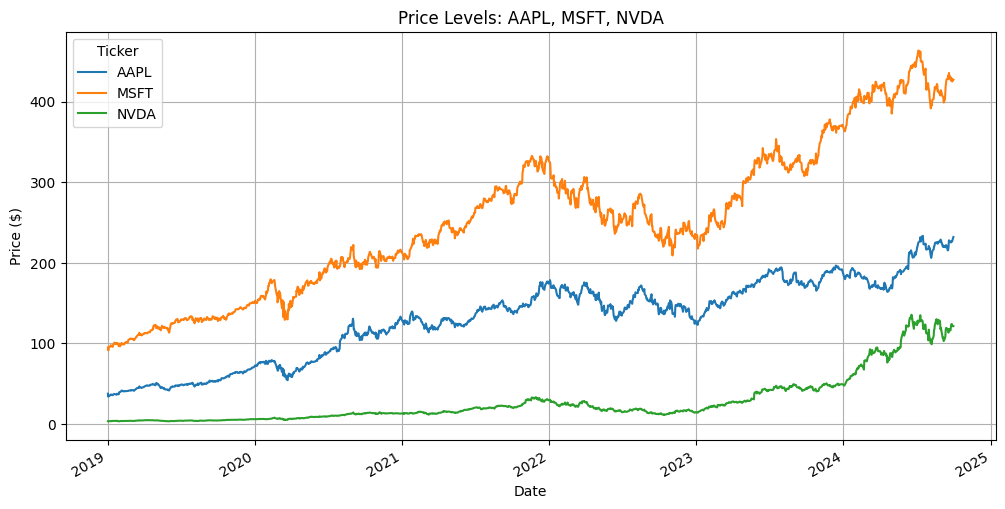

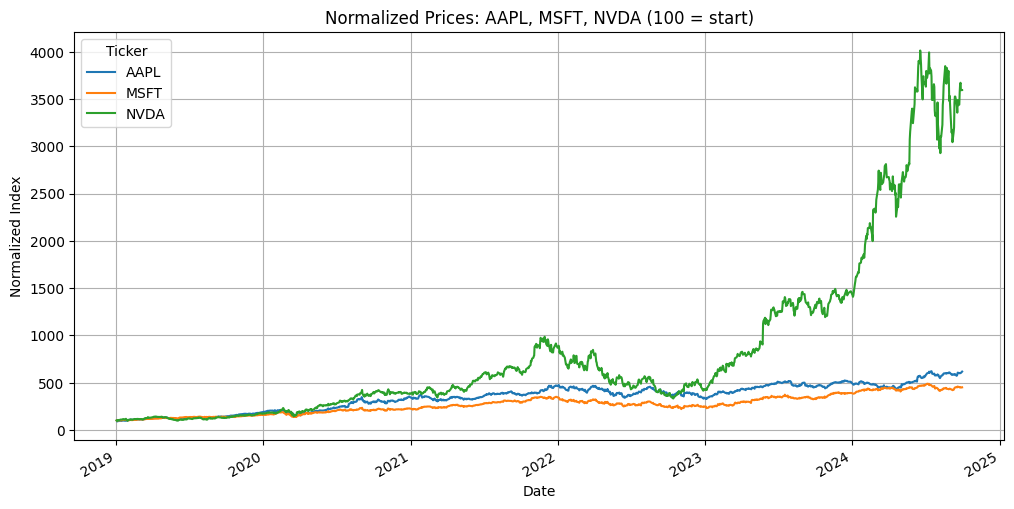

In [4]:
# Raw price levels
close_prices.plot(figsize=(12,6), title="Price Levels: AAPL, MSFT, NVDA")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid()
plt.savefig("week4_improved_outputs/prices_levels.png")
plt.show()

# Normalized prices (starting at 100)
normalized = (close_prices / close_prices.iloc[0]) * 100
normalized.plot(figsize=(12,6), title="Normalized Prices: AAPL, MSFT, NVDA (100 = start)")
plt.xlabel("Date")
plt.ylabel("Normalized Index")
plt.grid()
plt.savefig("week4_improved_outputs/prices_normalized.png")
plt.show()


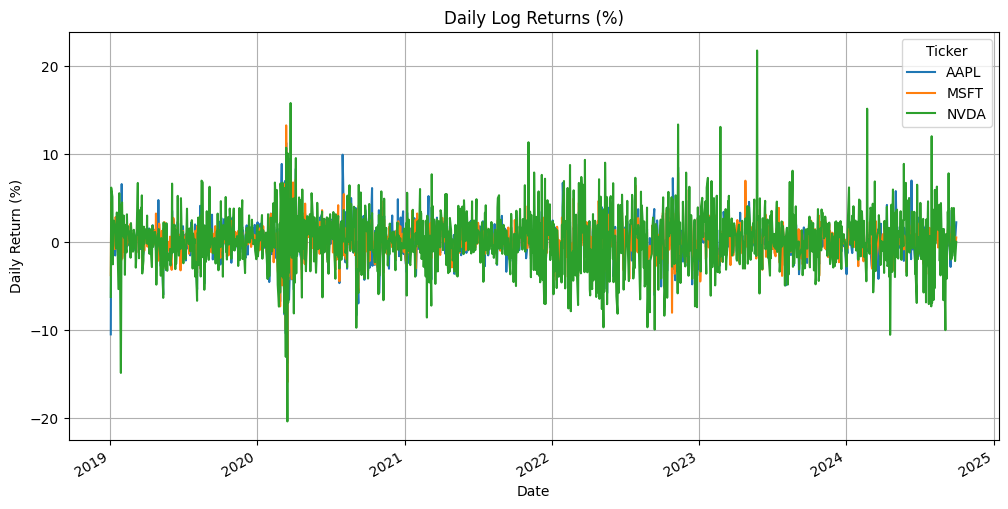

In [5]:
log_returns.plot(figsize=(12,6), title="Daily Log Returns (%)")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.grid()
plt.savefig("week4_improved_outputs/daily_returns.png")
plt.show()


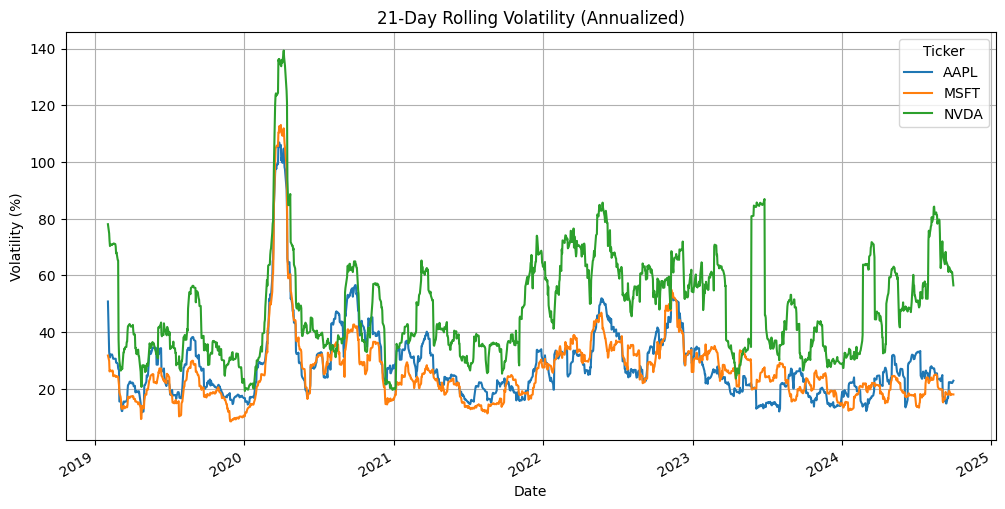

In [6]:
rolling_vol = log_returns.rolling(window=21).std() * np.sqrt(trading_days)
rolling_vol.plot(figsize=(12,6), title="21-Day Rolling Volatility (Annualized)")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.grid()
plt.savefig("week4_improved_outputs/rolling_vol_21d.png")
plt.show()


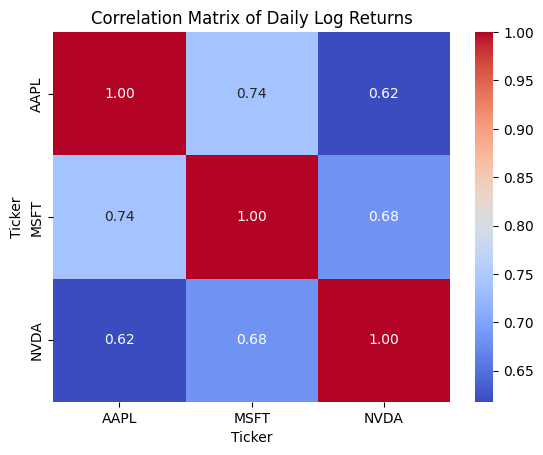

In [7]:
correlation_matrix = log_returns.corr()
correlation_matrix.to_csv("week4_improved_outputs/correlations.csv")

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Daily Log Returns")
plt.savefig("week4_improved_outputs/correlation_matrix.png")
plt.show()


In [8]:
# Save raw data for reproducibility
close_prices.to_csv("week4_improved_outputs/close_prices.csv")
log_returns.to_csv("week4_improved_outputs/log_returns.csv")
